**ARIMA AND SARIMA MODEL FOR TIME SERIES FORECASTING**

Genreal Process
1. Visualize the time series data
2. Make time series data stationary
3. Plot correlation and autocorrelation charts
4. Construct ARIMA and Seasonal ARIMA model based on data
5. Use model for forecasting





In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
df=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/ARIMA-And-Seasonal-ARIMA/master/perrin-freres-monthly-champagne-.csv")

In [15]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [16]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [17]:
df.columns=['Month','Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [18]:
df.drop(106,axis=0,inplace=True)
df.drop(105,axis=0,inplace=True) #cleaning the data dropping last two rows
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [19]:
#converting month to datetime
df['Month']=pd.to_datetime(df['Month'])
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [20]:
df.set_index('Month',inplace=True)
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [21]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


**Visualizing the time series data**

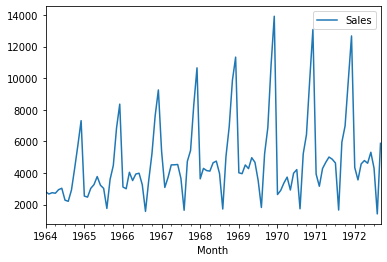

In [22]:
df.plot()

In [23]:
##testing for stationary using dickey fuller test
from statsmodels.tsa.stattools import adfuller

In [24]:
test_result=adfuller(df['Sales'])

In [32]:
##make function to test adfuller
def adfuller_test(sales):
  result=adfuller(sales)
  labels=['ADF test statistic','p-value','#Lags used','No. of observations used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
      print('Data is stationary')
  else:
      print('Data is not stationary')

In [28]:
adfuller_test(df['Sales'])

ADF test statistic : -1.8335930563276188
p-value : 0.363915771660247
#Lags used : 11
No. of observations used : 93
Data is not stationary


If our data is non stationary, we need to make it stationary. So first step is **Differencing**

In [29]:
df['Sales_first_difference']=df['Sales']-df['Sales'].shift(1)
#but our data looks seasonal
df['Seasonal_first_difference']=df['Sales']-df['Sales'].shift(12)
df.head(14)

,Sales,Sales_first_difference,Seasonal_first_difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [33]:
adfuller_test(df['Seasonal_first_difference'].dropna())

ADF test statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags used : 0
No. of observations used : 92
Data is stationary


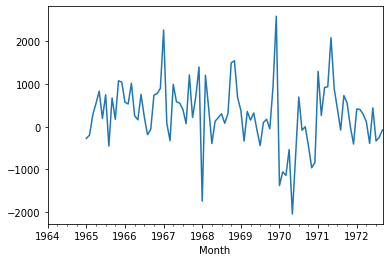

In [34]:
df["Seasonal_first_difference"].plot()

**Autoregressive Model**

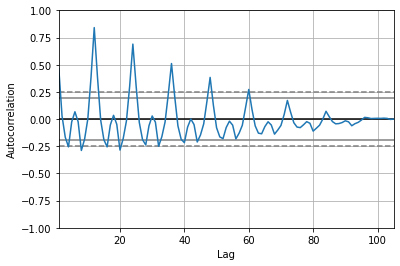

In [38]:
#plotting autocorrelation
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

For AR model , it is best to use PACF rather than ACF as shuts off past the order of model
For MA model, it is best to use ACF rather than PACF 

For ARIMA we use there variables p,d,q
p is for AR ,d is differencing, q is for MA 

In [42]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

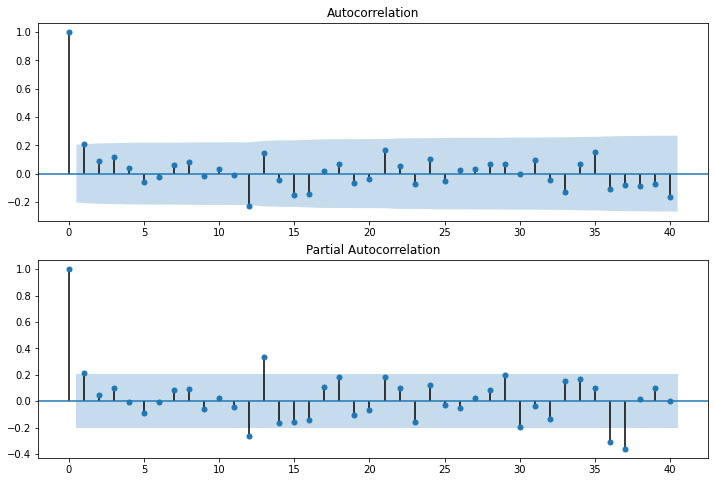

In [44]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(df["Seasonal_first_difference"].iloc[13:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(df["Seasonal_first_difference"].iloc[13:],lags=40,ax=ax2)


From above plot, we can use p from PACF as 1 and q from ACF as 1 or 0

In [45]:
#for non seasonal data
from statsmodels.tsa.arima_model import ARIMA

In [46]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [47]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Thu, 07 Jul 2022   AIC                           1910.251
Time:                        09:09:09   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7846     12.405      1.837      0.069      -1.529      47.098
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

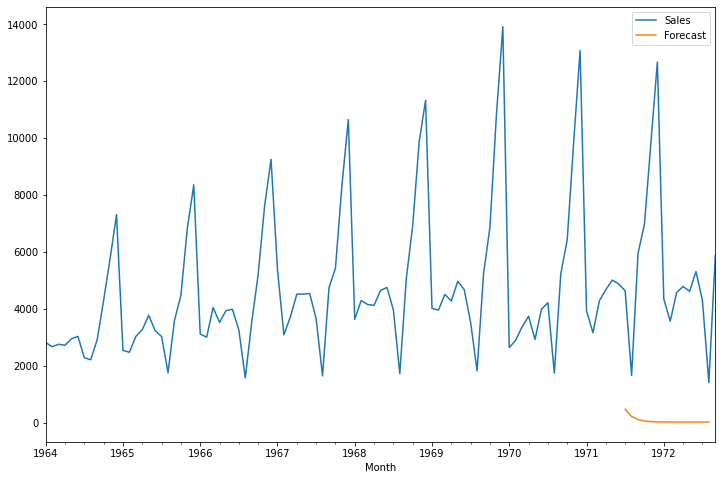

In [48]:
df['Forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','Forecast']].plot(figsize=(12,8))

As our data is seasonal, it forecasted badly using ARIMA.
So for seasonal data we need to use Seasonal ARIMA

In [54]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [55]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Thu, 07 Jul 2022   AIC                           1486.804
Time:                                    09:19:40   BIC                           1499.413
Sample:                                01-01-1964   HQIC                          1491.893
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (Q):                       40.24   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.46   Prob(JB):                         0.01
Heteroskedasticity (H):               1.18   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

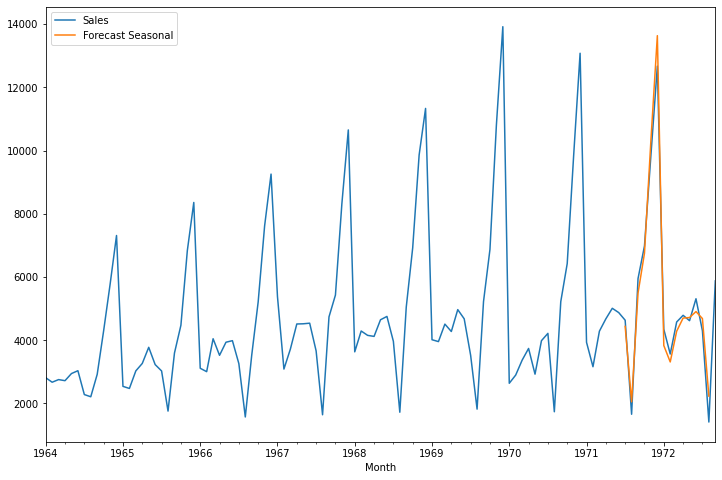

In [56]:
df['Forecast Seasonal']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','Forecast Seasonal']].plot(figsize=(12,8))


In [58]:
#creating future datasets
from pandas.tseries.offsets import DateOffset

In [59]:
future_dates=[df.index[-1]+DateOffset(months=x)for x in range(0,24)]

In [60]:
future_dataset_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [61]:
future_dataset_df.tail()

,Sales,Sales_first_difference,Seasonal_first_difference,Forecast,Forecast Seasonal
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN


In [62]:
#cocatenating datasets
future_df=pd.concat([df,future_dataset_df])
future_df.tail()

,Sales,Sales_first_difference,Seasonal_first_difference,Forecast,Forecast Seasonal
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN


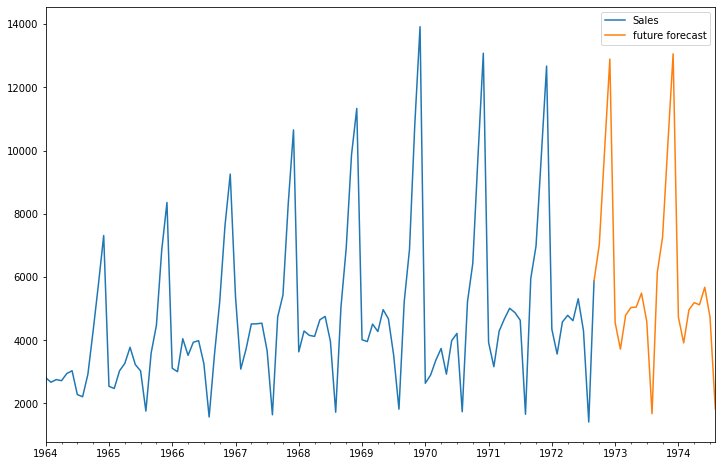

In [64]:
future_df['future forecast']=results.predict(start=104,end=130,dynamic=True)
future_df[['Sales','future forecast']].plot(figsize=(12,8))